In [ ]:
'''ライブラリの準備'''
import pickle
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [ ]:
with open('/content/drive/MyDrive/Bachelor_thisis/dataset/pic.bin', 'rb') as p:
    data = pickle.load(p)

train = data[0]
test = data[1]

train_set = train[0]
train_eval = train[1]

test_set = test[0]
test_eval = test[1]

In [ ]:
# 使用するDeviceの指定
# GPUが使用できる方はGPU, 使用できない方はCPUを使用するように設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Tensorに変換
x_train = torch.Tensor(train_set)
y_train = torch.Tensor(train_eval)
x_test = torch.Tensor(test_set)
y_test = torch.Tensor(test_eval)
# データセッを作成
ds_train = TensorDataset(x_train, y_train)
# DataLoaderを作成
train_loader = DataLoader(ds_train, batch_size=1, shuffle=True)

In [ ]:
'''モデルの定義'''
class Net(nn.Module):
    def __init__(self, n_vis=26, n_hid=32, n_out=81, device='cpu'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_vis, n_hid)
        self.fc2 = nn.Linear(n_hid, n_out)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x
net = Net()

In [ ]:
'''最適化手法の定義'''
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

'''学習'''
losses = []
for epoch in range(1000):
    total_loss = 0
    for train_x, train_y in train_loader:
        optimizer.zero_grad()
        loss = criterion( net(train_x), train_y )
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    losses.append(total_loss)
    print(epoch+1, ':', 'loss = ', total_loss.item())

1 : loss =  1.2419378757476807
2 : loss =  0.8808795213699341
3 : loss =  0.7939973473548889
4 : loss =  0.7717887759208679
5 : loss =  0.7563848495483398
6 : loss =  0.7431523203849792
7 : loss =  0.73112553358078
8 : loss =  0.7199739217758179
9 : loss =  0.7092282772064209
10 : loss =  0.6993577480316162
11 : loss =  0.6902502775192261
12 : loss =  0.6814687252044678
13 : loss =  0.6741381883621216
14 : loss =  0.6666538119316101
15 : loss =  0.6600117087364197
16 : loss =  0.6535916328430176
17 : loss =  0.647646427154541
18 : loss =  0.6415990591049194
19 : loss =  0.6360059976577759
20 : loss =  0.630353569984436
21 : loss =  0.6250187754631042
22 : loss =  0.619398295879364
23 : loss =  0.614139199256897
24 : loss =  0.6086309552192688
25 : loss =  0.6033563613891602
26 : loss =  0.5978569984436035
27 : loss =  0.5925782918930054
28 : loss =  0.5869373083114624
29 : loss =  0.5816519856452942
30 : loss =  0.5760204195976257
31 : loss =  0.5705216526985168
32 : loss =  0.56465053

In [ ]:
## save model

model_path = '/content/drive/MyDrive/Colab Notebooks/NN/nn0_apply.pt'
torch.save(net, model_path)

In [ ]:
epoch_num = []
for i in range(epoch+1):
    epoch_num.append(i+1)

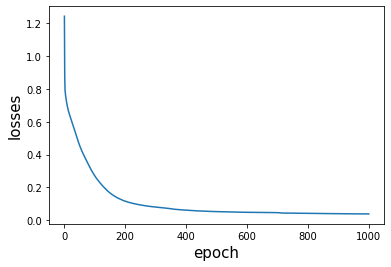

In [ ]:
fig, ax = plt.subplots()
ax.plot(epoch_num, losses)
ax.set_xlabel('epoch')
ax.set_ylabel('losses')
ax.set_xlabel('epoch', fontsize=15)
ax.set_ylabel('losses', fontsize=15)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)

In [ ]:
net = net.eval()

In [ ]:
pred = net(x_test)

In [ ]:
max_diff_list = []
gen_ind_list = []

In [ ]:
for i in range(len(y_test)):
    teach_data = y_test[i].detach().cpu().numpy()
    pred_data = pred[i].detach().cpu().numpy()

    min_elem = np.min(np.nonzero(teach_data))
    judge = round(min_elem / 2, 3)
    data_diff = np.round(np.abs(teach_data - pred_data), 2)

    max_diff = np.max(data_diff)
    max_diff_list.append(max_diff)

    gen_ind = np.count_nonezero(data_diff >= judge)
    gen_ind_list.append(gen_ind)

In [ ]:
gen_ind_array = np.array(gen_ind_list)
gen_ind_mean = np.mean(gen_ind_array)

print('gen_ind_mean = ', gen_ind_mean)

In [ ]:
max_diff_array = np.array(max_diff_list)
total_max_diff = np.max(max_diff_array)
max_idx = np.argmax(max_diff_array)

print('total_max_diff = ', total_max_diff)
print('max_idx = ', max_idx)

total_max_diff =  0.18
max_idx =  0


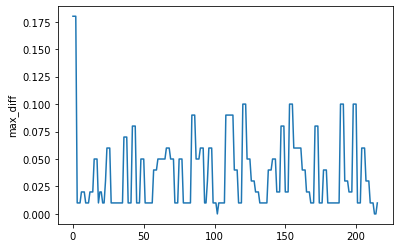

In [ ]:
x1 = np.arange(0, len(max_diff_array))
y1 = max_diff_array

plt.ylabel("max_diff")

plt.plot(x1, y1)
plt.show()

In [ ]:
x2 = np.arange(0, len(gen_ind_array))
y2 =gen_ind_array

plt.ylabel("gen_ind")

plt.plot(x2, y2)
plt.show()

In [ ]:
teach_data = y_test[max_idx].detach().cpu().numpy()
pred_data = pred[max_idx].detach().cpu().numpy()

In [ ]:
x1_axis = [i for i in range(len(y_train[0]+1))]
x2_axis = [i+0.5 for i in range(len(pred[0] + 1))]

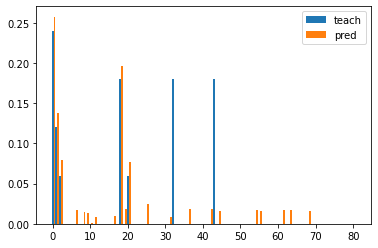

In [ ]:
plt.bar(x1_axis, teach_data, width=0.5, label='teach')
plt.bar(x2_axis, pred_data, width=0.5, label='pred')

plt.legend()
plt.show()